In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [36]:
np.random.seed(0)

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [38]:
assert(X_train.shape[0] == y_train.shape[0]), " The number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), " The number of images is not equal to number of labels"
assert(X_train.shape[1:] == (28,28)), " The image size is not 28X28"
assert(X_test.shape[1:] == (28,28)), " The image size is not 28X28"

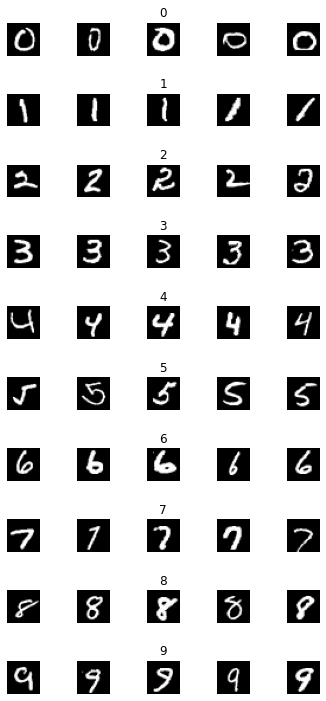

In [39]:
n_samples = []
cols = 5
n_classes = 10
fig,ax = plt.subplots(nrows = n_classes,ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(n_classes):
        x_selected = X_train[y_train == j]
        ax[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:], cmap = plt.get_cmap('gray'))
        ax[j][i].axis('off')
        if i == 2:
            ax[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of imges')

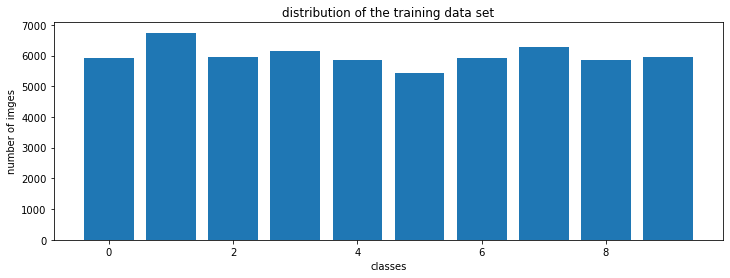

In [40]:
print(n_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,n_classes), n_samples)
plt.title('distribution of the training data set')
plt.xlabel("classes")
plt.ylabel('number of imges')

In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [42]:
X_train = X_train/255
X_test = X_test/255

In [43]:
n_pixels = 784
X_train = X_train.reshape(X_train.shape[0],n_pixels)
X_test = X_test.reshape(X_test.shape[0],n_pixels)
#CONVERTING IMGE SIZE TO SINGLE ROW ND 784 COLOUMNS

In [44]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim = n_pixels, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(n_classes, activation = 'softmax'))
    model.compile(Adam(lr=0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [45]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
h = model.fit(X_train, y_train, validation_split = 0.1, batch_size = 200, epochs = 10, verbose = 1, shuffle = 'true')

Epoch 1/10
270/270 [==============================] - 4s 8ms/step - loss: 1.6499 - accuracy: 0.4212 - val_loss: 0.8387 - val_accuracy: 0.7345
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.9068 - accuracy: 0.7021 - val_loss: 0.8237 - val_accuracy: 0.7107
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.8929 - accuracy: 0.6994 - val_loss: 0.8129 - val_accuracy: 0.7352
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.9207 - accuracy: 0.6884 - val_loss: 0.7542 - val_accuracy: 0.7413
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.8774 - accuracy: 0.7077 - val_loss: 0.8116 - val_accuracy: 0.7302
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.8743 - accuracy: 0.7073 - val_loss: 0.9113 - val_accuracy: 0.6640
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.8934 - accuracy: 0.7018 - val_loss: 0.8362 - val_accuracy: 0.7162
Epoch 

Text(0.5, 0, 'epoch')

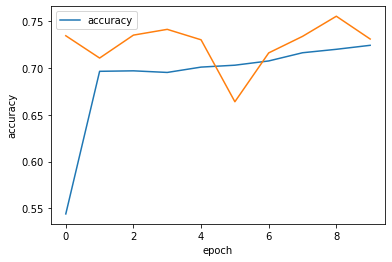

In [47]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

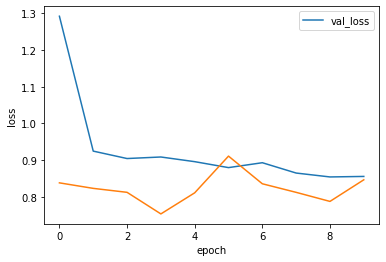

In [48]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss'])
plt.legend(['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [49]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('test score is:', score[0])
print('test accuracy is:', score[1])

<class 'list'>
test score is: 0.9288001656532288
test accuracy is: 0.7053999900817871


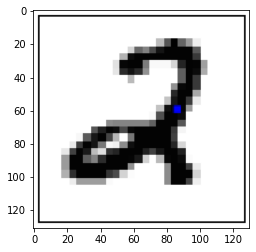

In [50]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

(131, 130, 3)
(28, 28, 3)


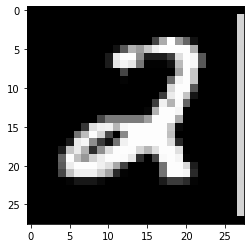

In [51]:
img_array = np.asarray(img)
print(img_array.shape)
import cv2 as cv
resized = cv.resize(img_array,(28,28))
print(resized.shape)
gry = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
corrected = cv.bitwise_not(gry)
plt.imshow(corrected, cmap = plt.get_cmap('gray'))

In [52]:
image = corrected/255
image = corrected.reshape(1,784)

In [53]:
prediction = model.predict_classes(image)
print("prediction is:",prediction)

prediction is: [1]


In [54]:
score = model.evaluate(X_test,y_test, verbose = 0)
print('The evaluation of loss function is:',score[0])
print('The test accuracy is', score[1])

The evaluation of loss function is: 0.9288001656532288
The test accuracy is 0.7053999900817871
